In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
Titanic=pd.read_csv('Titanic.csv')

In [3]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [60]:
Titanic=Titanic.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

In [61]:
Titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,0.526589,0.000000,2.110213,2
1,1,1,0,38.000000,0.526589,0.000000,4.280593,0
2,1,3,0,26.000000,0.000000,0.000000,2.188856,2
3,1,1,0,35.000000,0.526589,0.000000,3.990834,2
4,0,3,1,35.000000,0.000000,0.000000,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.000000,0.000000,2.639057,2
887,1,1,0,19.000000,0.000000,0.000000,3.433987,2
888,0,3,0,29.699118,0.526589,0.741276,3.196630,2
889,1,1,1,26.000000,0.000000,0.000000,3.433987,0


In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    Titanic[val]=le.fit_transform(Titanic[val].astype(str))

In [64]:
Titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,0.526589,0.000000,2.110213,2
1,1,1,0,38.000000,0.526589,0.000000,4.280593,0
2,1,3,0,26.000000,0.000000,0.000000,2.188856,2
3,1,1,0,35.000000,0.526589,0.000000,3.990834,2
4,0,3,1,35.000000,0.000000,0.000000,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.000000,0.000000,2.639057,2
887,1,1,0,19.000000,0.000000,0.000000,3.433987,2
888,0,3,0,29.699118,0.526589,0.741276,3.196630,2
889,1,1,1,26.000000,0.000000,0.000000,3.433987,0


In [65]:
Titanic.Survived.unique()

array([0, 1], dtype=int64)

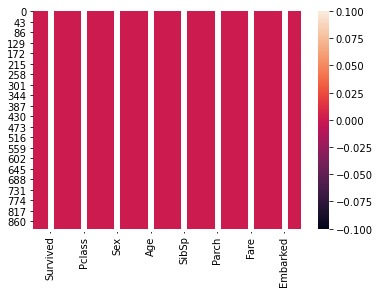

In [66]:
sns.heatmap(Titanic.isnull(),annot=True)

In [67]:
Titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [68]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
Titanic['Age']=imp.fit_transform(Titanic['Age'].values.reshape(-1,1))

In [69]:
Titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,0.526589,0.000000,2.110213,2
1,1,1,0,38.000000,0.526589,0.000000,4.280593,0
2,1,3,0,26.000000,0.000000,0.000000,2.188856,2
3,1,1,0,35.000000,0.526589,0.000000,3.990834,2
4,0,3,1,35.000000,0.000000,0.000000,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.000000,0.000000,2.639057,2
887,1,1,0,19.000000,0.000000,0.000000,3.433987,2
888,0,3,0,29.699118,0.526589,0.741276,3.196630,2
889,1,1,1,26.000000,0.000000,0.000000,3.433987,0


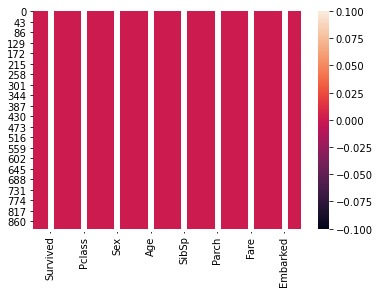

In [70]:
sns.heatmap(Titanic.isnull(),annot=True)

In [71]:
Titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       1.178905
Parch       1.443387
Fare        0.394928
Embarked   -1.246689
dtype: float64

In [72]:
for col in Titanic.columns:
    if Titanic.skew().loc[col]>0.55:
        Titanic[col]=np.log1p(Titanic[col])

In [73]:
Titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       1.002587
Parch       1.354107
Fare        0.394928
Embarked   -1.246689
dtype: float64

In [74]:
Titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,0.073601,0.132436,0.329862,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.331339,-0.025682,-0.014980,-0.661022,0.157112
Sex,-0.543351,0.131900,1.000000,0.084153,-0.189147,-0.256102,-0.263276,0.104057
Age,-0.069809,-0.331339,0.084153,1.000000,-0.199877,-0.252707,0.102485,-0.022239
SibSp,0.073601,-0.025682,-0.189147,-0.199877,1.000000,0.463057,0.393265,0.010906
Parch,0.132436,-0.014980,-0.256102,-0.252707,0.463057,1.000000,0.370655,0.014507
Fare,0.329862,-0.661022,-0.263276,0.102485,0.393265,0.370655,1.000000,-0.197567
Embarked,-0.163517,0.157112,0.104057,-0.022239,0.010906,0.014507,-0.197567,1.000000


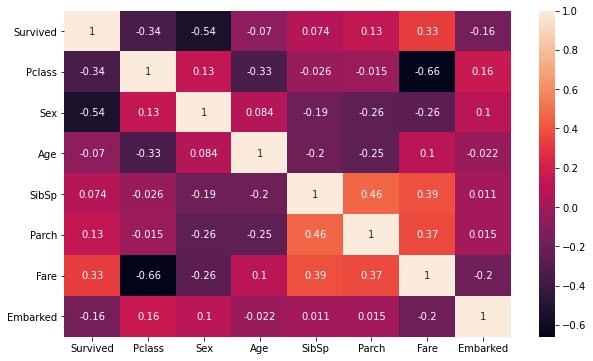

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(Titanic.corr(),annot=True)

In [76]:
col=Titanic.columns.values
ncol=5
nrow=5

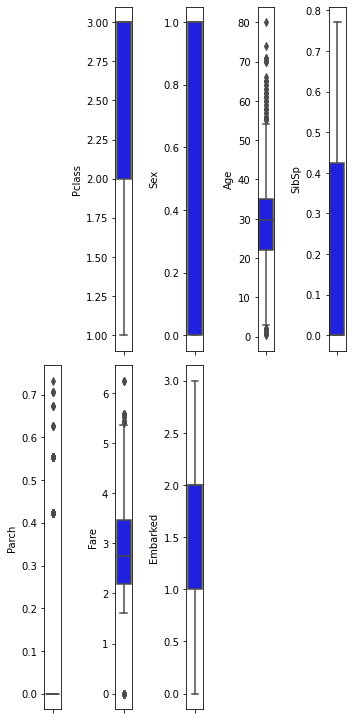

In [77]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(Titanic[col[i]],color='blue',orient='v')
    plt.tight_layout()

In [78]:
from scipy.stats import zscore
z_score=abs(zscore(Titanic))
print(Titanic.shape)
Tit=Titanic.loc[(z_score<3).all(axis=1)]
print(Tit.shape)

(891, 8)
(866, 8)


In [79]:
Tit

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,0.423036,0.000000,2.110213,2
1,1,1,0,38.000000,0.423036,0.000000,4.280593,0
2,1,3,0,26.000000,0.000000,0.000000,2.188856,2
3,1,1,0,35.000000,0.423036,0.000000,3.990834,2
4,0,3,1,35.000000,0.000000,0.000000,2.202765,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.000000,0.000000,2.639057,2
887,1,1,0,19.000000,0.000000,0.000000,3.433987,2
888,0,3,0,29.699118,0.423036,0.554618,3.196630,2
889,1,1,1,26.000000,0.000000,0.000000,3.433987,0


In [80]:
Tit=pd.DataFrame(data=Tit)

In [81]:
x=Tit.iloc[:,1:-1]

In [82]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,0.423036,0.000000,2.110213
1,1,0,38.000000,0.423036,0.000000,4.280593
2,3,0,26.000000,0.000000,0.000000,2.188856
3,1,0,35.000000,0.423036,0.000000,3.990834
4,3,1,35.000000,0.000000,0.000000,2.202765
...,...,...,...,...,...,...
886,2,1,27.000000,0.000000,0.000000,2.639057
887,1,0,19.000000,0.000000,0.000000,3.433987
888,3,0,29.699118,0.423036,0.554618,3.196630
889,1,1,26.000000,0.000000,0.000000,3.433987


In [83]:
x.shape

(866, 6)

In [84]:
y=Tit.iloc[:,0]

In [85]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 866, dtype: int64

In [86]:
y.shape

(866,)

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [88]:
lr=LogisticRegression()

In [89]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7692307692307693
[[131  36]
 [ 24  69]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       167
           1       0.66      0.74      0.70        93

    accuracy                           0.77       260
   macro avg       0.75      0.76      0.76       260
weighted avg       0.78      0.77      0.77       260



In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7692307692307693
[[142  25]
 [ 35  58]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.70      0.62      0.66        93

    accuracy                           0.77       260
   macro avg       0.75      0.74      0.74       260
weighted avg       0.77      0.77      0.77       260



In [91]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7730769230769231
[[153  14]
 [ 45  48]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       167
           1       0.77      0.52      0.62        93

    accuracy                           0.77       260
   macro avg       0.77      0.72      0.73       260
weighted avg       0.77      0.77      0.76       260



In [92]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.65
[[158   9]
 [ 82  11]]
              precision    recall  f1-score   support

           0       0.66      0.95      0.78       167
           1       0.55      0.12      0.19        93

    accuracy                           0.65       260
   macro avg       0.60      0.53      0.49       260
weighted avg       0.62      0.65      0.57       260



In [93]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.823076923076923
[[144  23]
 [ 23  70]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       167
           1       0.75      0.75      0.75        93

    accuracy                           0.82       260
   macro avg       0.81      0.81      0.81       260
weighted avg       0.82      0.82      0.82       260



In [94]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7884615384615384
[[137  30]
 [ 25  68]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       167
           1       0.69      0.73      0.71        93

    accuracy                           0.79       260
   macro avg       0.77      0.78      0.77       260
weighted avg       0.79      0.79      0.79       260



In [95]:
import joblib
joblib.dump(rf,'Titanic.pkl')

['Titanic.pkl']